In [1]:
import datetime
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

In [2]:
def convertDate(d):
    if d != '':
        dt = datetime.datetime.strptime(d, '%Y-%m-%d')
    else:
        dt = d
    return dt

countries = pd.read_csv('../input/countries.csv')
census = pd.read_csv('../input/age_gender_bkts.csv')
sessions = pd.read_csv('../input/sessions.csv')
train = pd.read_csv('../input/train_users_2.csv', converters={'date_account_created': convertDate, 'date_first_booking': convertDate})
test = pd.read_csv('../input/test_users.csv', converters={'date_account_created': convertDate})

In [3]:
print "We have", len(train), "users in the training set and", len(test), "in the test set."
print "In total we have", len(train) + len(test), "users."

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [4]:
# Merge train and test users
users = pd.concat((train, test), axis=0, ignore_index=True)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02 00:00:00,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08 00:00:00,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18 00:00:00,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


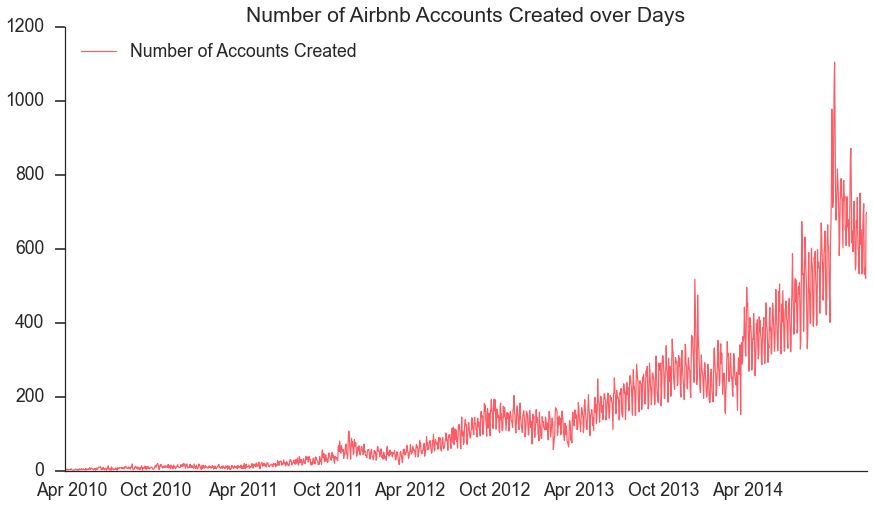

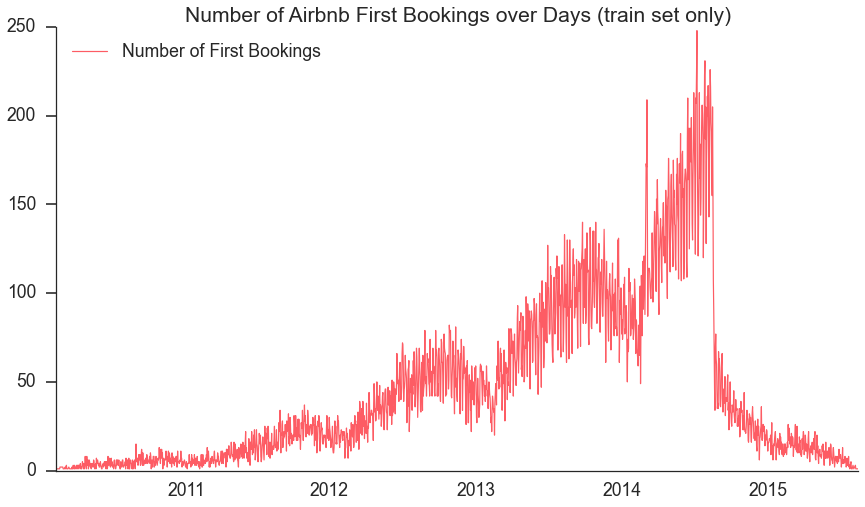

In [5]:
plt.figure()
users.date_account_created.value_counts(dropna=True).plot(kind='line', linewidth=1.2, label='Number of Accounts Created', color='#FD5C64', rot=0)
plt.legend(loc='best')
plt.title('Number of Airbnb Accounts Created over Days')
sns.despine()
plt.figure()
train.date_first_booking.value_counts(dropna=True).plot(kind='line', linewidth=1.2, label='Number of First Bookings', color='#FD5C64', rot=0)
plt.legend(loc='best')
plt.title('Number of Airbnb First Bookings over Days (train set only)')
sns.despine()
plt.show()

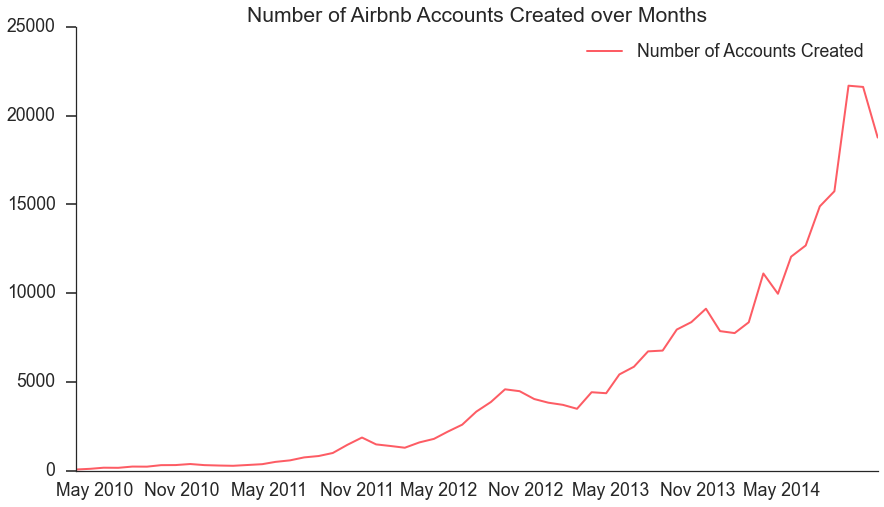

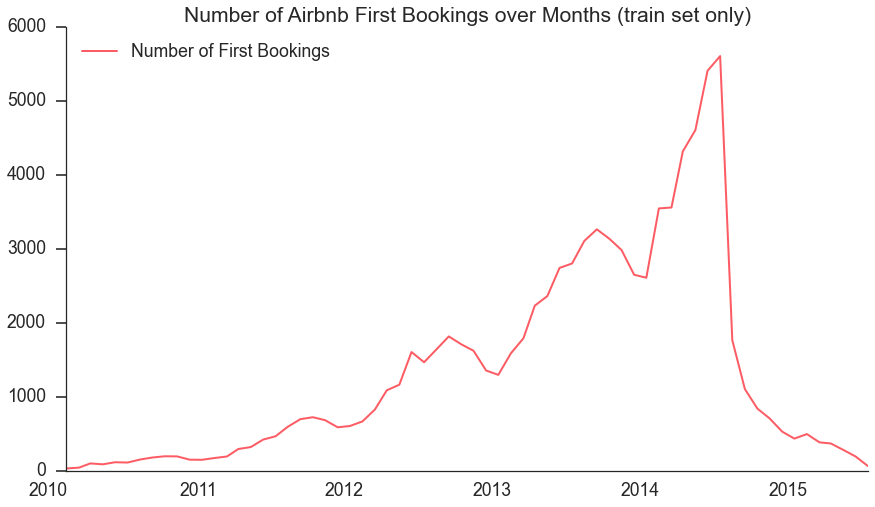

In [6]:
def convertDate2(d):
    if d != '':
        dt = datetime.datetime.strptime(d, '%Y-%m-%d')
        dt = dt.replace(day=1)
    else:
        dt = d
    return dt

train_ = pd.read_csv('../input/train_users_2.csv', converters={'date_account_created': convertDate2, 'date_first_booking': convertDate2})
test_ = pd.read_csv('../input/test_users.csv', converters={'date_account_created': convertDate2})
users_ = pd.concat((train_, test_), axis=0, ignore_index=True)

plt.figure()
users_.date_account_created.value_counts(dropna=True).plot(kind='line', linewidth=2, label='Number of Accounts Created', color='#FD5C64', rot=0)
plt.legend(loc='best')
plt.title('Number of Airbnb Accounts Created over Months')
sns.despine()
plt.figure()
train_.date_first_booking.value_counts(dropna=True).plot(kind='line', linewidth=2, label='Number of First Bookings', color='#FD5C64', rot=0)
plt.legend(loc='best')
plt.title('Number of Airbnb First Bookings over Months (train set only)')
sns.despine()
plt.show()

In [7]:
users.gender.replace('-unknown-', np.nan, inplace=True)
train.gender.replace('-unknown-', np.nan, inplace=True)
test.gender.replace('-unknown-', np.nan, inplace=True)

In [8]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan.drop('id')
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

In [9]:
users_nan

affiliate_channel           0.000000
affiliate_provider          0.000000
age                        42.412365
country_destination        22.535538
date_account_created        0.000000
date_first_booking         67.733998
first_affiliate_tracked     2.208335
first_browser               0.000000
first_device_type           0.000000
gender                     46.990169
id                          0.000000
language                    0.000000
signup_app                  0.000000
signup_flow                 0.000000
signup_method               0.000000
timestamp_first_active      0.000000
dtype: float64

In [10]:
print "Just for the sake of curiosity..."
print "  we have", int((train.date_first_booking.isnull().sum()/float(train.shape[0]))*100), "% of missing values at date_first_booking in the training data"
print "  we have", int((train.gender.isnull().sum()/float(train.shape[0]))*100), "% of missing values at gender in the training data"
print "  we have", int((train.age.isnull().sum()/float(train.shape[0]))*100), "% of missing values at age in the training data"
print "  we have", int((train.first_affiliate_tracked.isnull().sum()/float(train.shape[0]))*100), "% of missing values at first_affiliate_tracked in the training data"

Just for the sake of curiosity...
  we have 58 % of missing values at date_first_booking in the training data
  we have 44 % of missing values at gender in the training data
  we have 41 % of missing values at age in the training data
  we have 2 % of missing values at first_affiliate_tracked in the training data


In [11]:
print "Just for the sake of curiosity..."
print "  we have", int((test.date_first_booking.isnull().sum()/float(test.shape[0]))*100), "% of missing values at date_first_booking in the test data"
print "  we have", int((test.gender.isnull().sum()/float(test.shape[0]))*100), "% of missing values at gender in the test data"
print "  we have", int((test.age.isnull().sum()/float(test.shape[0]))*100), "% of missing values at age in the test data"
print "  we have", int((test.first_affiliate_tracked.isnull().sum()/float(test.shape[0]))*100), "% of missing values at first_affiliate_tracked in the test data"

Just for the sake of curiosity...
  we have 100 % of missing values at date_first_booking in the test data
  we have 54 % of missing values at gender in the test data
  we have 46 % of missing values at age in the test data
  we have 0 % of missing values at first_affiliate_tracked in the test data


In [12]:
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [13]:
print "Outlier thresholds: ", int(28-1.5*(42-28)), ",", int(42+1.5*(42-28))
print "More extreme thresholds: ", int(28-3*(42-28)), ",", int(42+3*(42-28))

Outlier thresholds:  7 , 63
More extreme thresholds:  -14 , 84


In [14]:
users[users.age>63].age.describe()

count    7772.000000
mean      285.326943
std       594.850366
min        64.000000
25%        67.000000
50%        73.000000
75%       105.000000
max      2014.000000
Name: age, dtype: float64

In [15]:
users[users.age>84].age.describe()

count    3073.000000
mean      616.362512
std       844.843218
min        85.000000
25%       105.000000
50%       105.000000
75%      1947.000000
max      2014.000000
Name: age, dtype: float64

In [16]:
users[users.age<18].age.describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

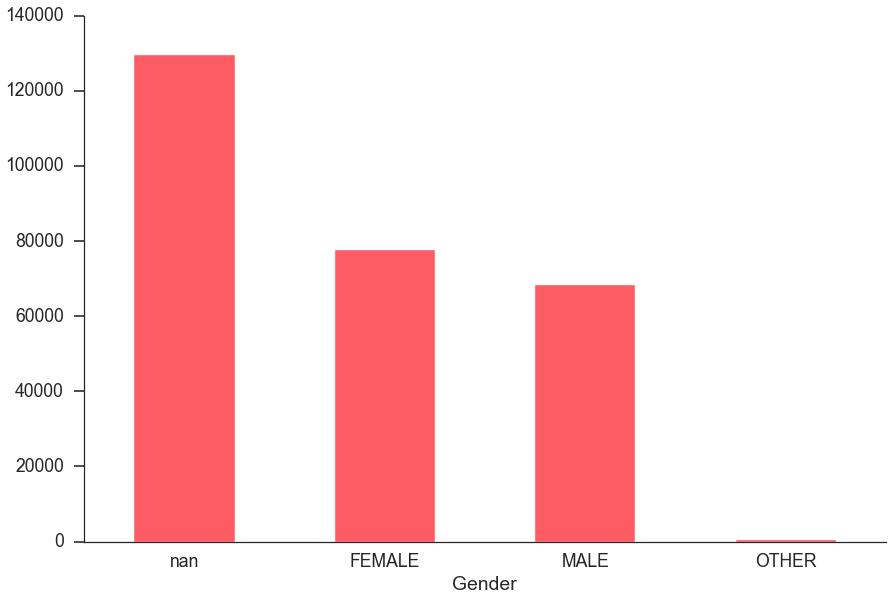

In [17]:
users.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()
plt.show()

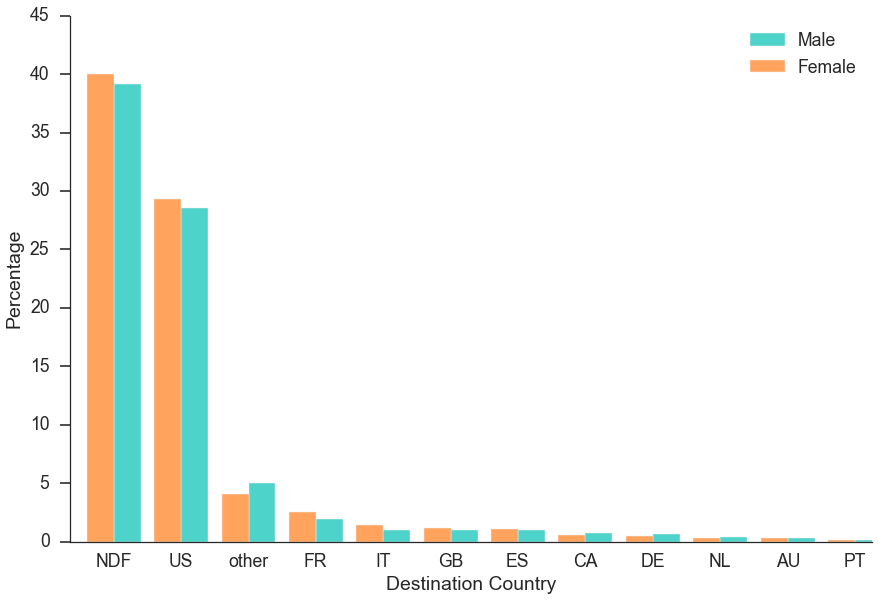

In [18]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

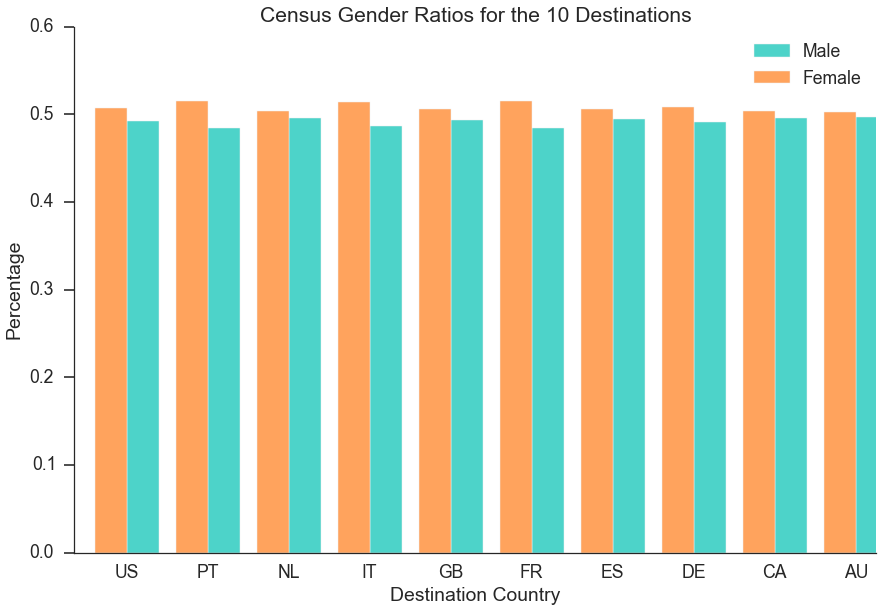

In [19]:
#women = census[census['gender'] == 'female']['population_in_thousands'].sum()
#men = census[census['gender'] == 'male']['population_in_thousands'].sum()

population_by_countries = census.groupby('country_destination').population_in_thousands.sum()

female_destinations = census[census.gender=='female'].groupby('country_destination').population_in_thousands.sum()/population_by_countries
male_destinations = census[census.gender=='male'].groupby('country_destination').population_in_thousands.sum()/population_by_countries

# Bar width
width = 0.4

male_destinations.reindex(index = census.country_destination.unique()[::-1]).plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.reindex(index = census.country_destination.unique()[::-1]).plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Census Gender Ratios for the 10 Destinations')

sns.despine()
plt.show()

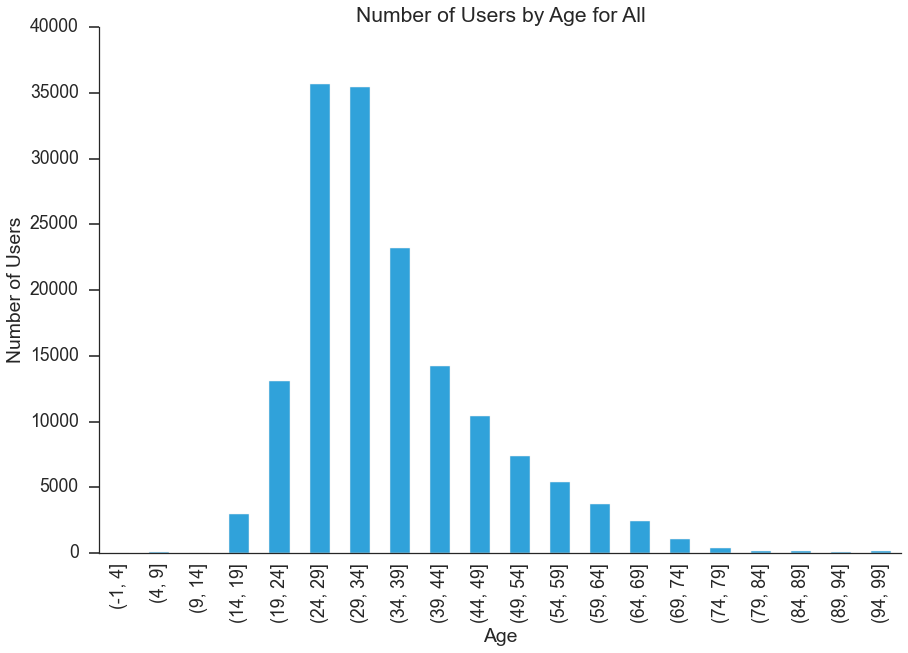

In [20]:
users.groupby(pd.cut(users.age, np.arange(-1,101,5))).age.count().plot(kind='bar')

plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Number of Users by Age for All')

sns.despine()
plt.show()

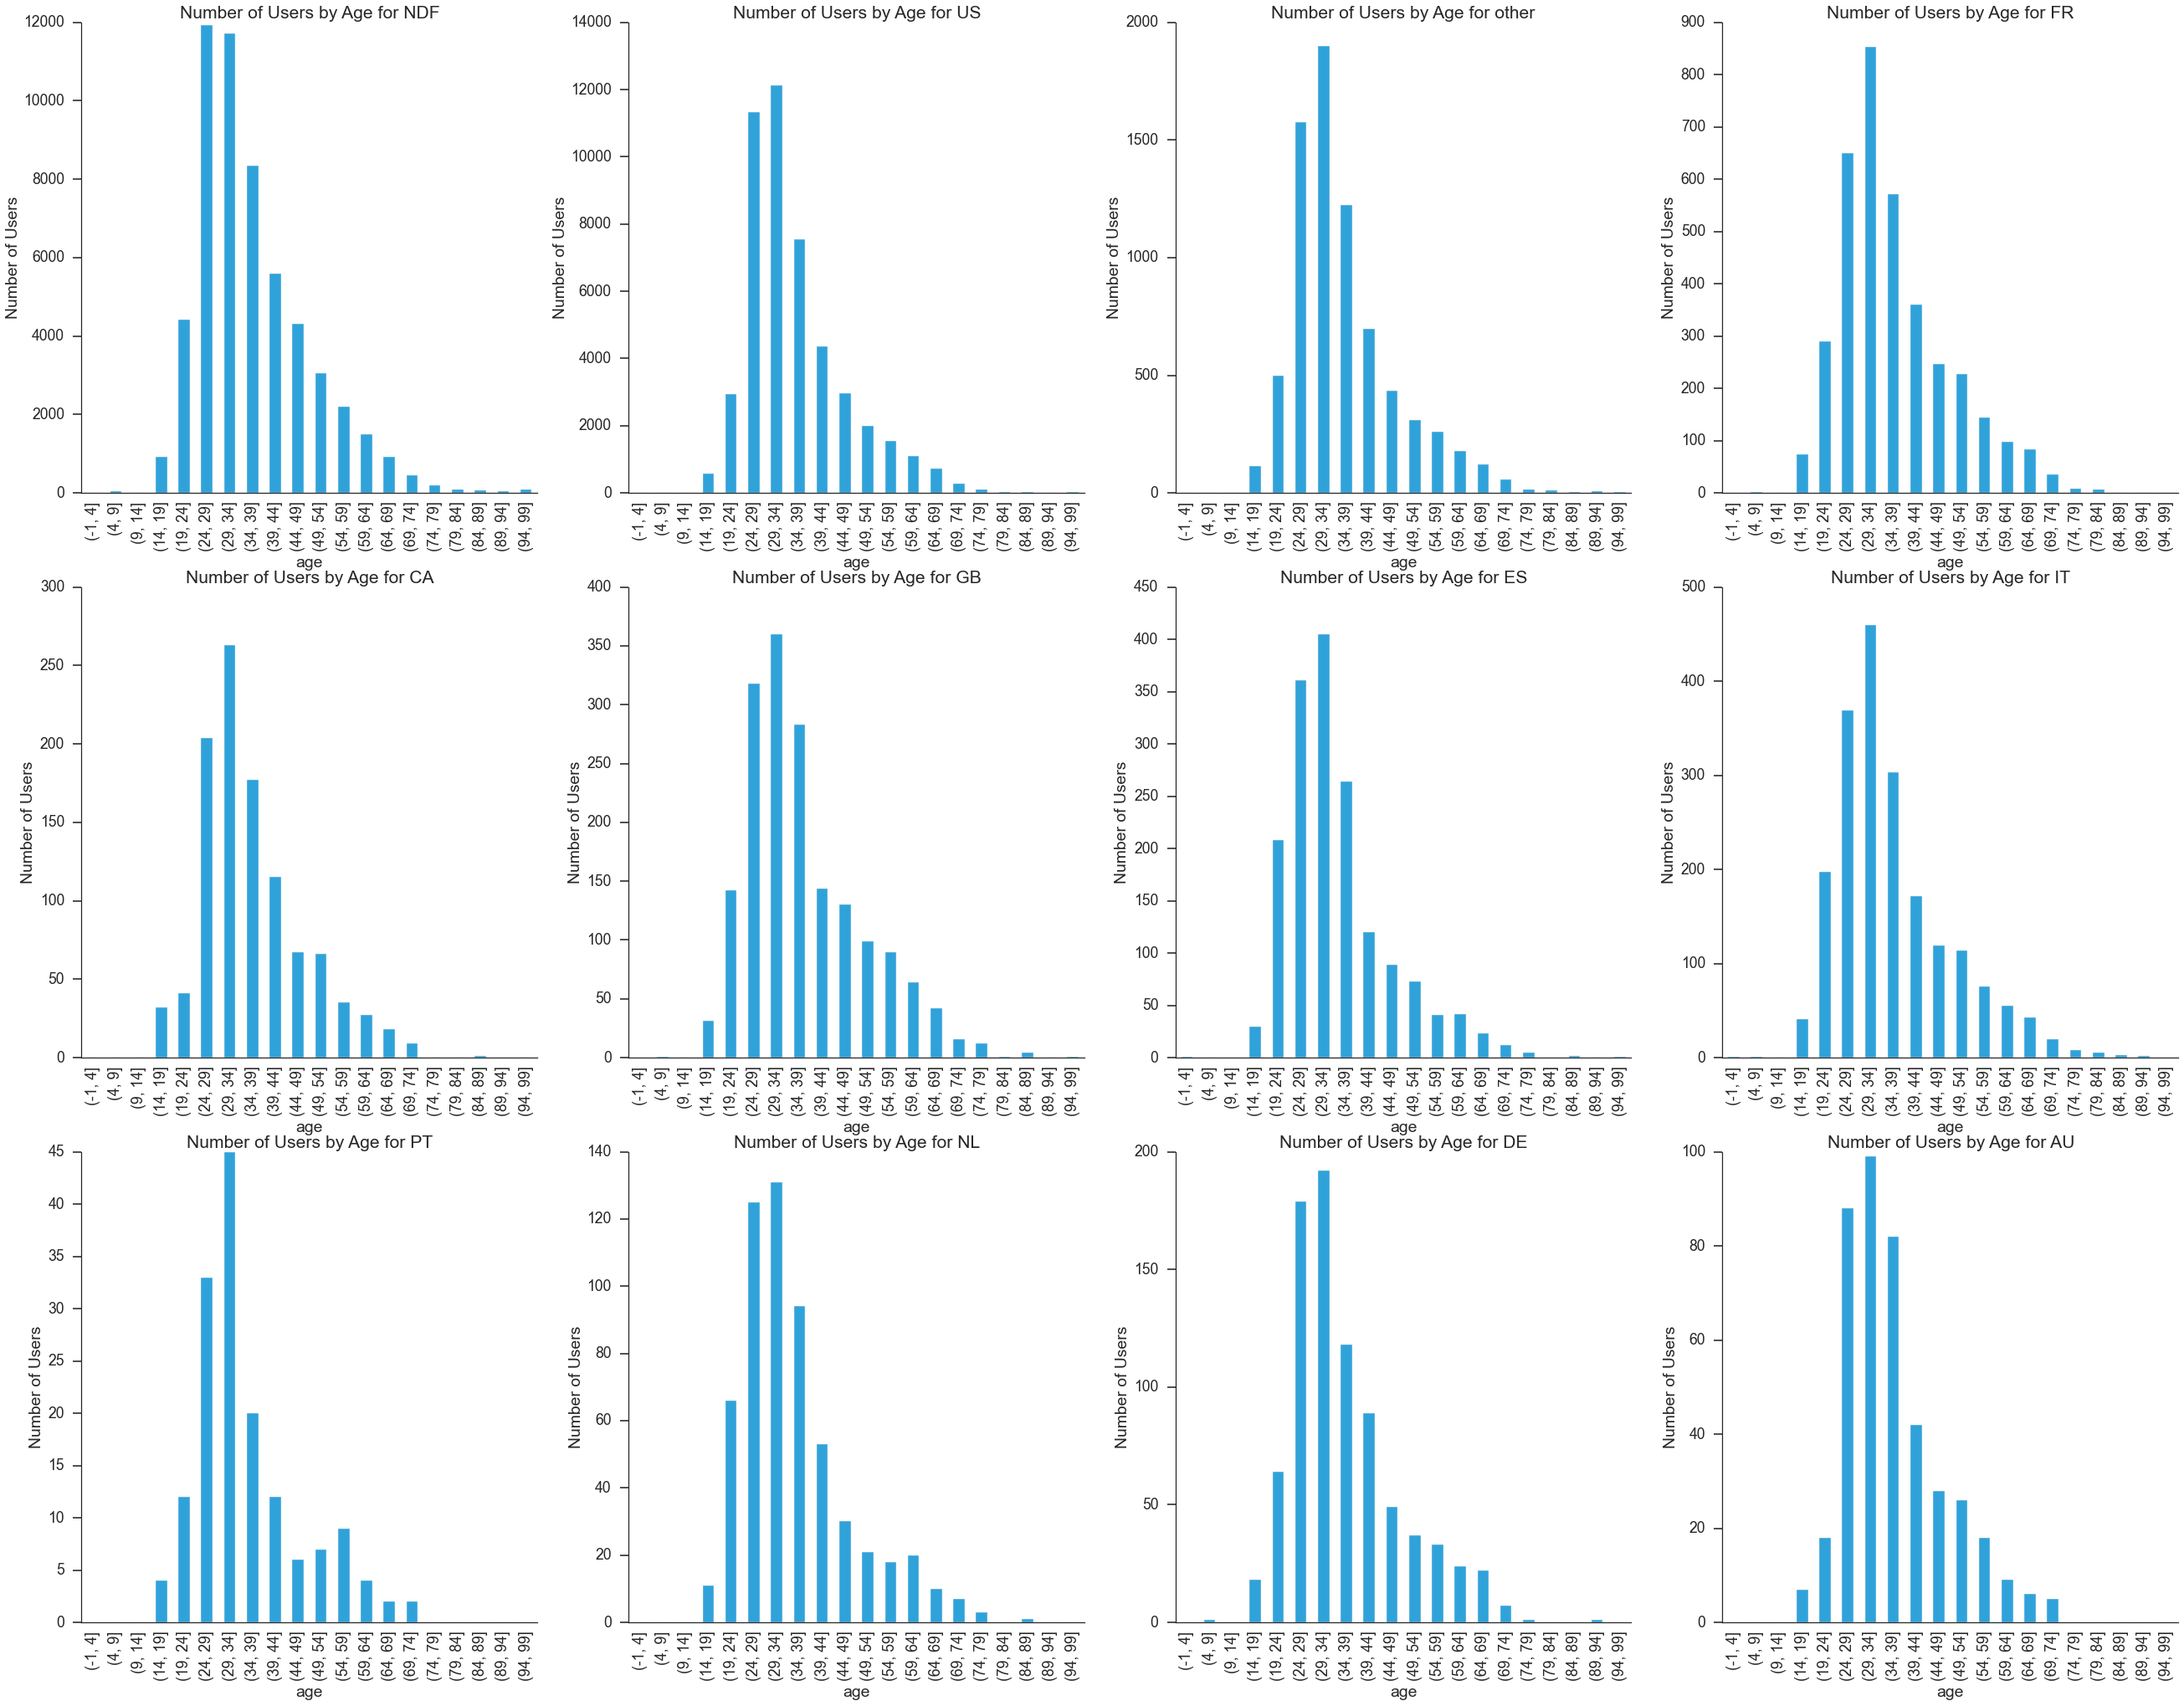

In [21]:
fig = plt.figure(figsize=(40,32))
pos = 1
for i in users.country_destination.unique():
    if type(i) != float:
        subset = users[users.country_destination==i]
        ax = fig.add_subplot(3,4,pos)
        subset.groupby(pd.cut(subset.age, np.arange(-1,101,5))).age.count().plot(kind='bar')

        plt.ylabel('Number of Users')
        plt.title('Number of Users by Age for %s' % i)
        sns.despine()
        pos += 1

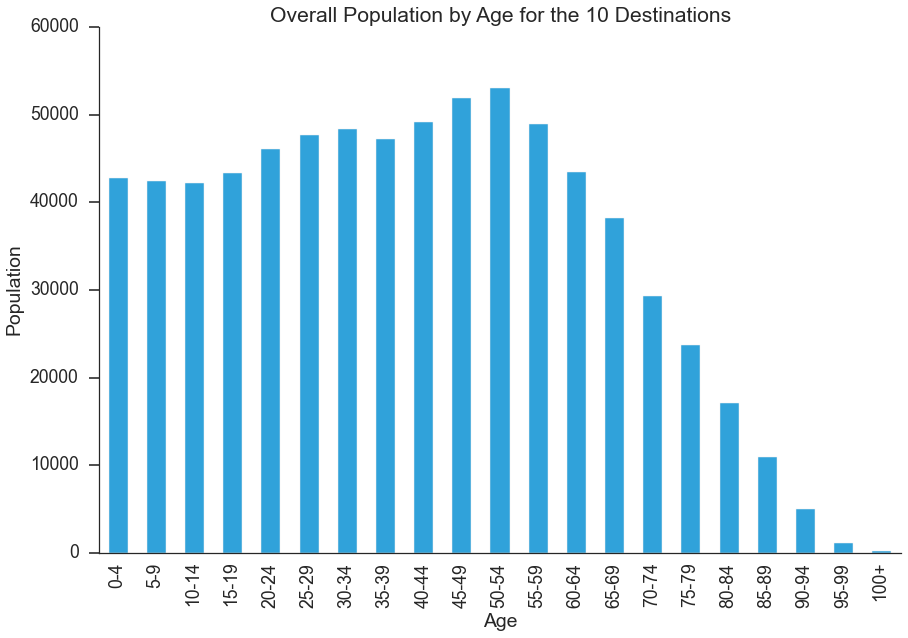

In [22]:
census.groupby('age_bucket').population_in_thousands.sum().reindex(index = census.age_bucket.unique()[::-1]).plot(kind='bar')

plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Overall Population by Age for the 10 Destinations')

sns.despine()
plt.show()

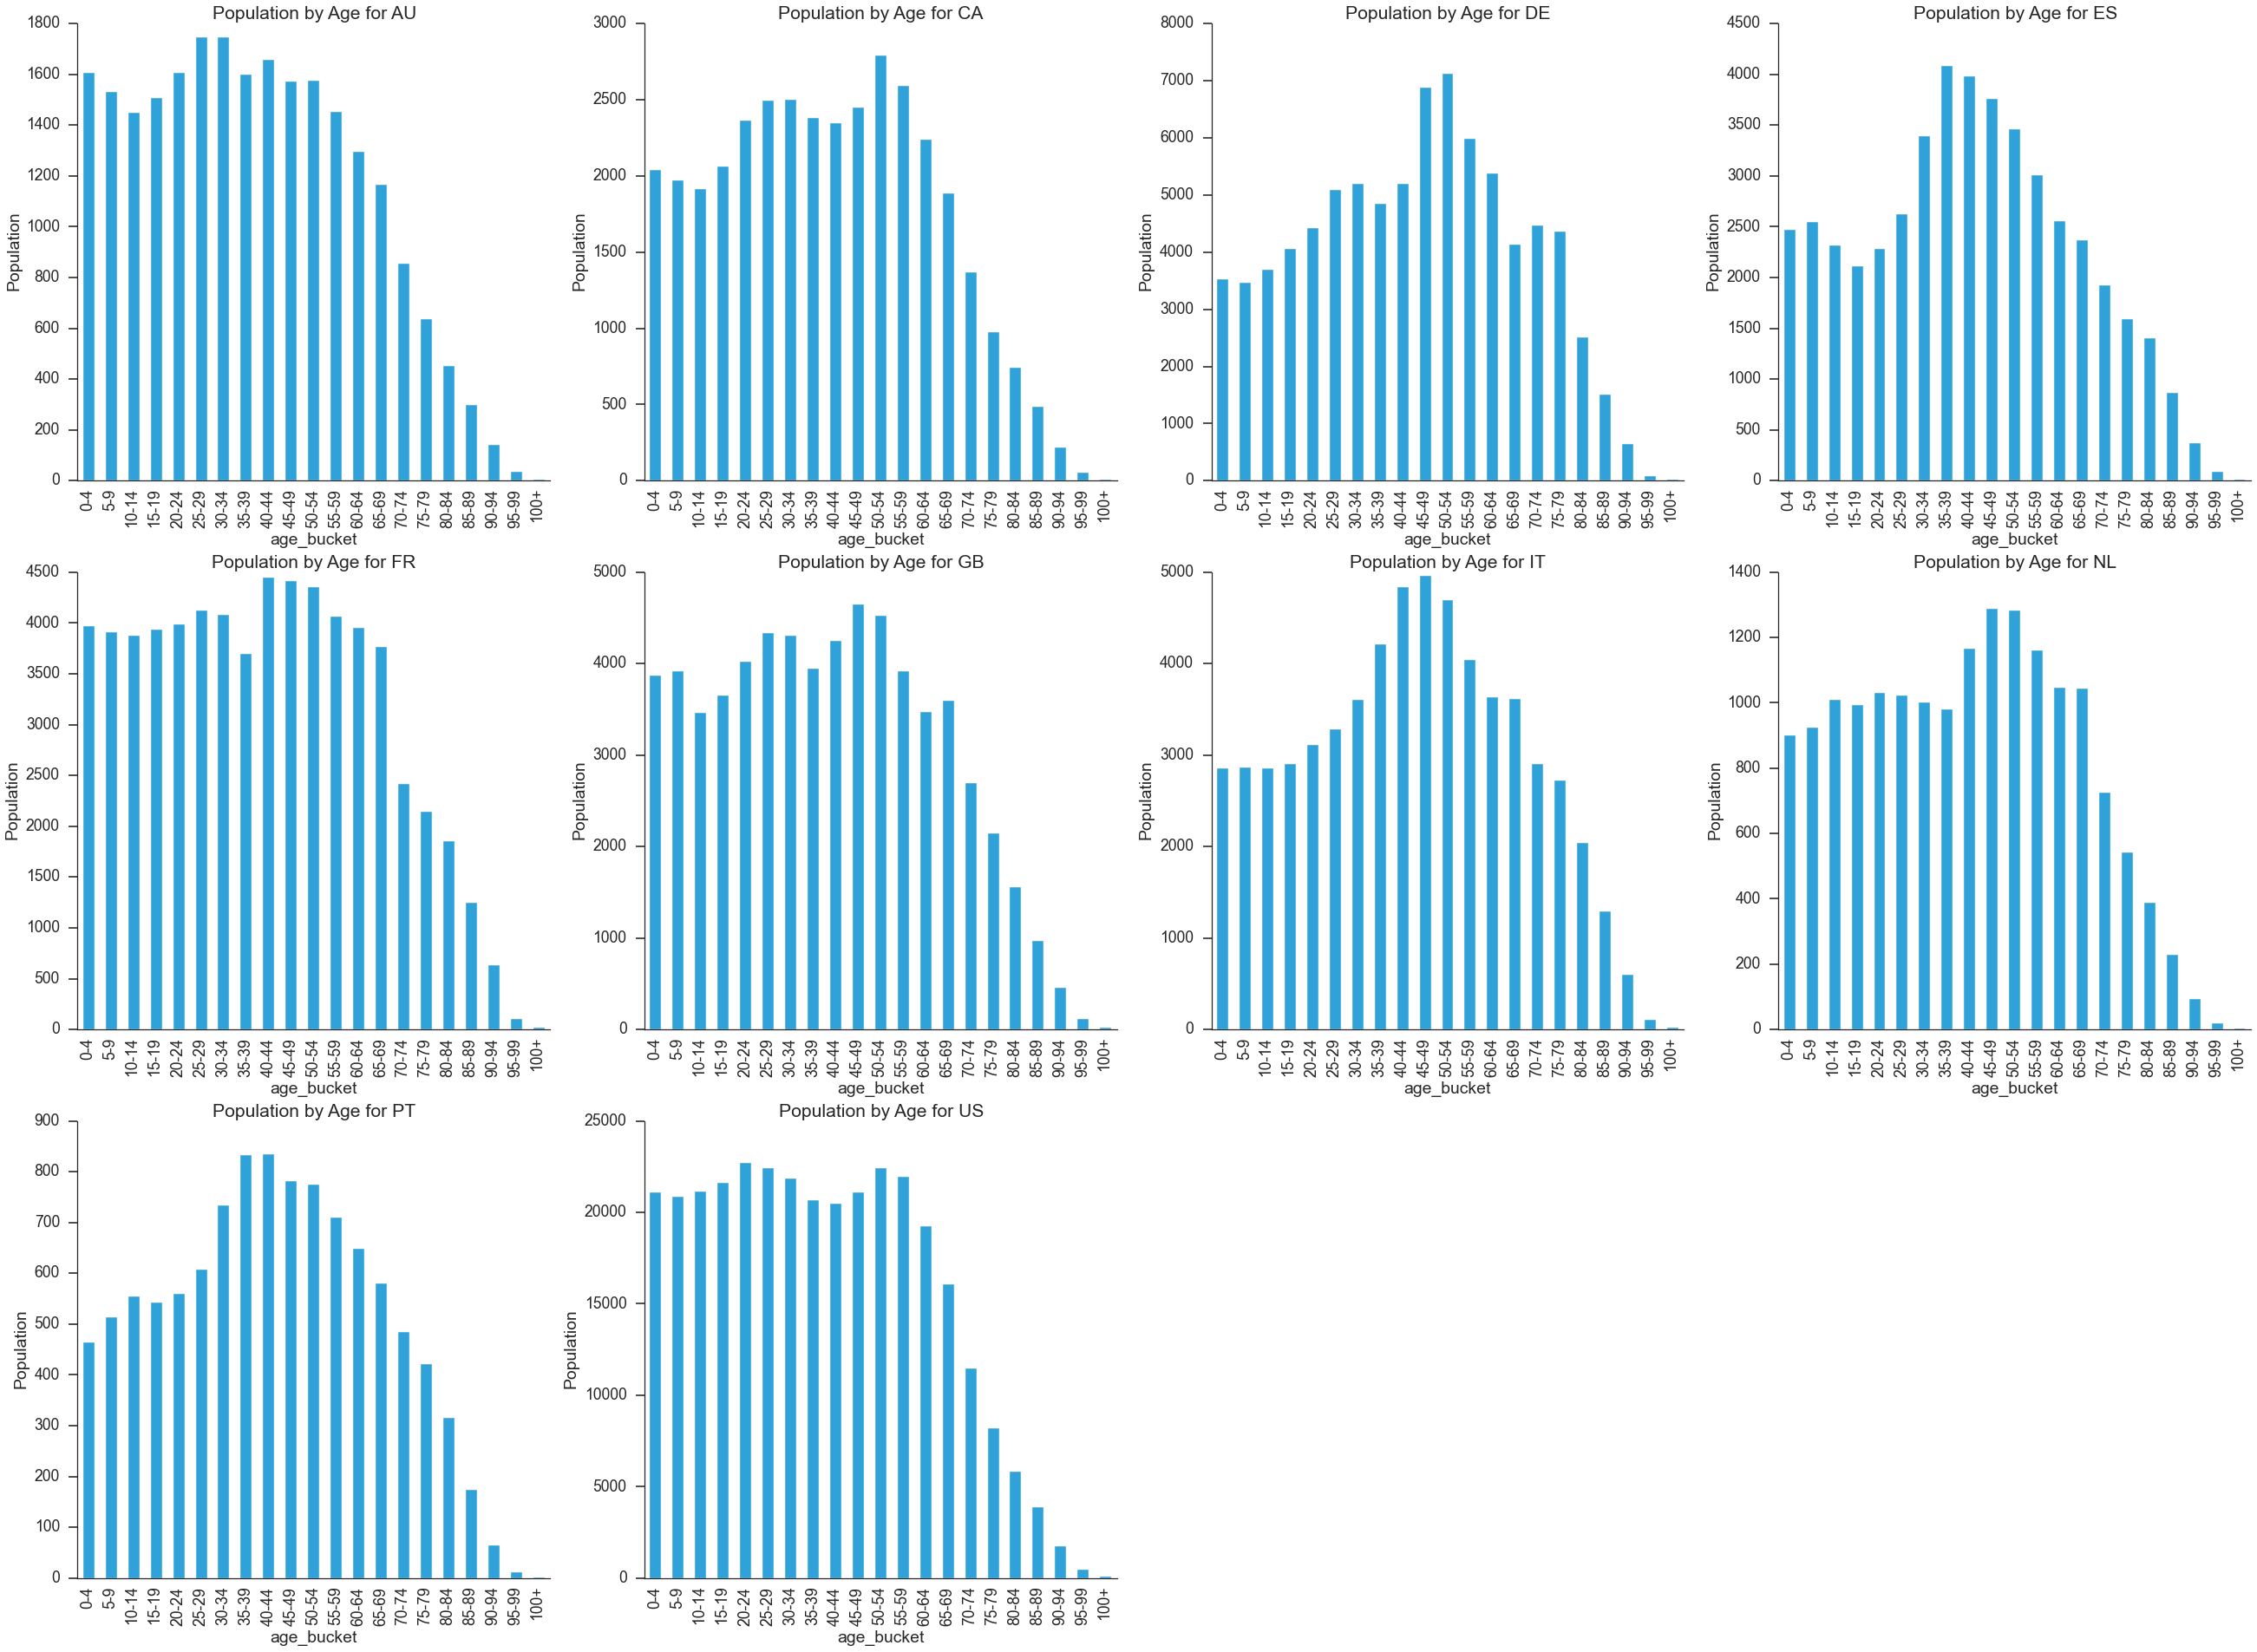

In [23]:
fig = plt.figure(figsize=(40,30))
pos = 1
for i in census.country_destination.unique():
    subset = census[census.country_destination==i]
    ax = fig.add_subplot(3,4,pos)
    subset.groupby('age_bucket').population_in_thousands.sum().reindex(index = census.age_bucket.unique()[::-1]).plot(kind='bar')

    plt.ylabel('Population')
    plt.title('Population by Age for %s' % i)
    sns.despine()
    pos += 1

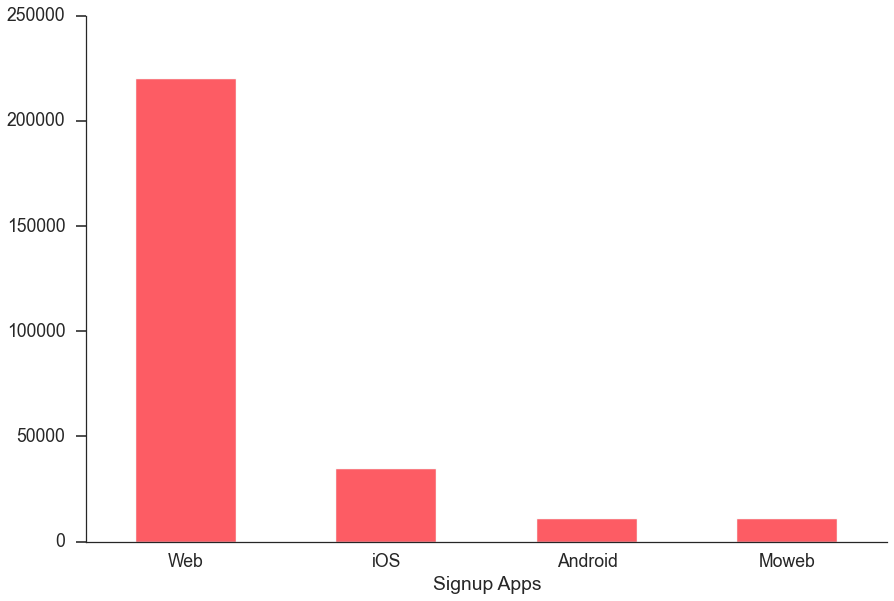

In [24]:
users.signup_app.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Signup Apps')
sns.despine()
plt.show()

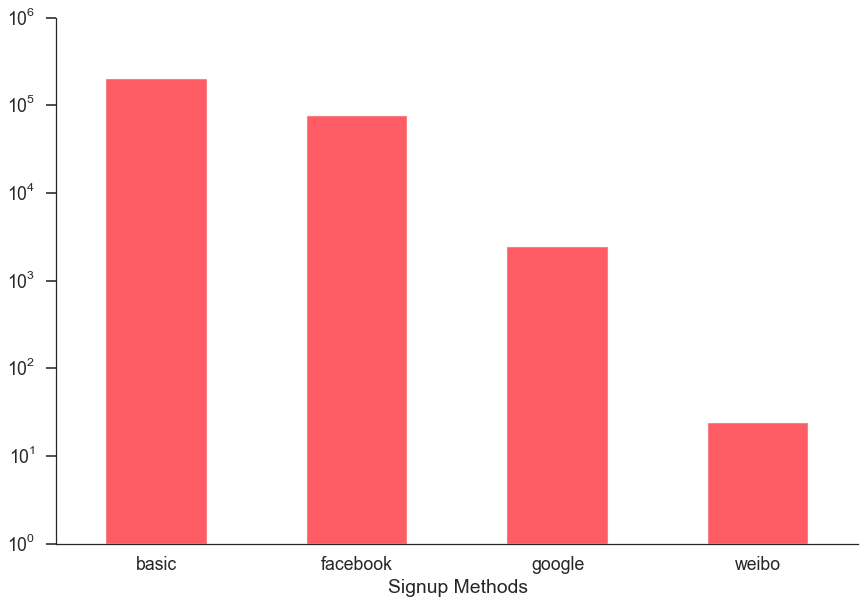

In [25]:
users.signup_method.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', log=True, rot=0)
plt.xlabel('Signup Methods')
sns.despine()
plt.show()

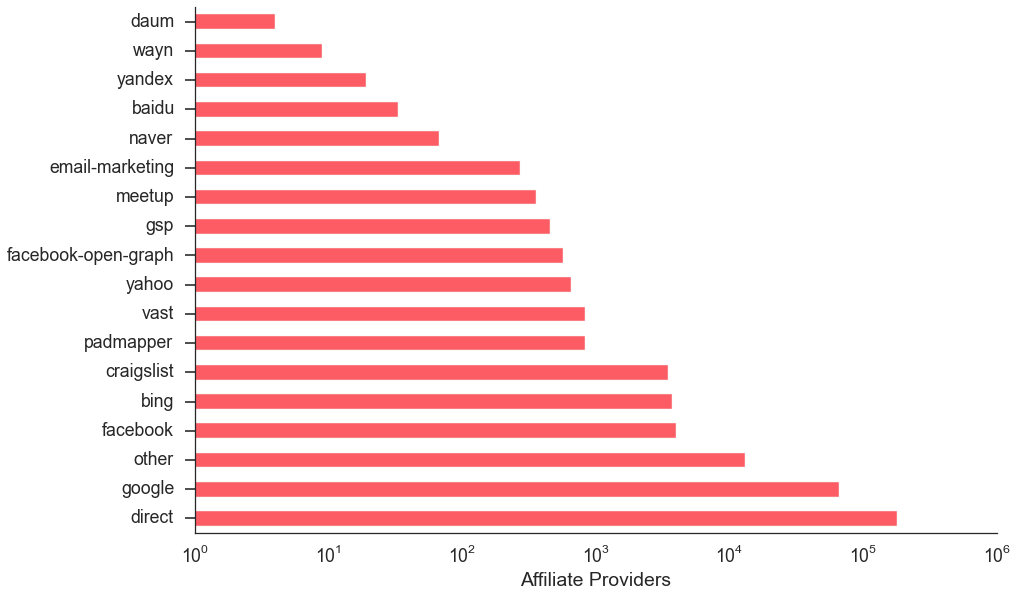

In [26]:
users.affiliate_provider.value_counts(dropna=False).plot(kind='barh', color='#FD5C64', log=True, rot=0)
plt.xlabel('Affiliate Providers')
sns.despine()
plt.show()

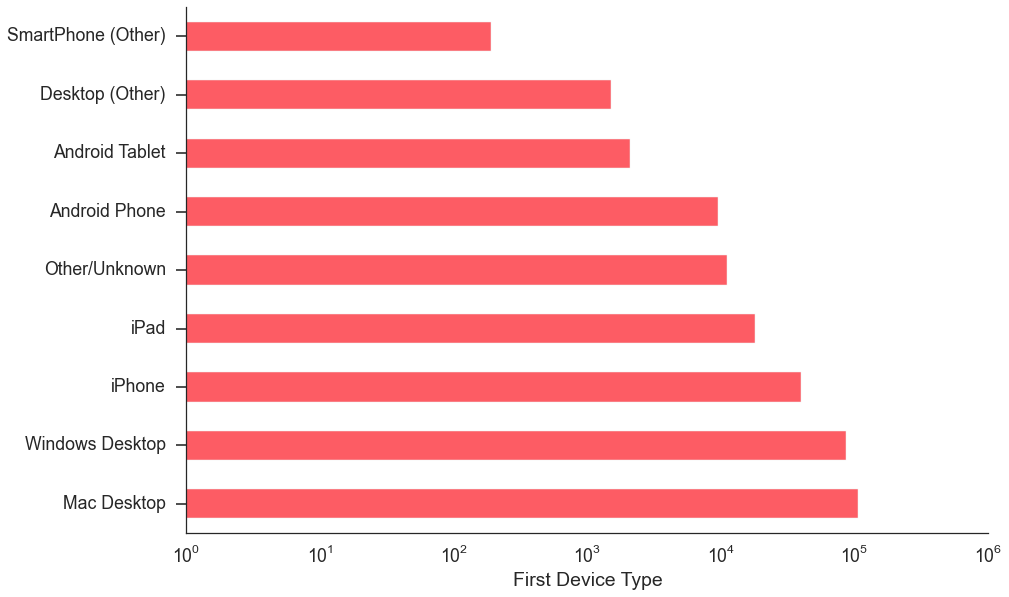

In [27]:
users.first_device_type.value_counts(dropna=False).plot(kind='barh', color='#FD5C64', log=True, rot=0)
plt.xlabel('First Device Type')
sns.despine()
plt.show()

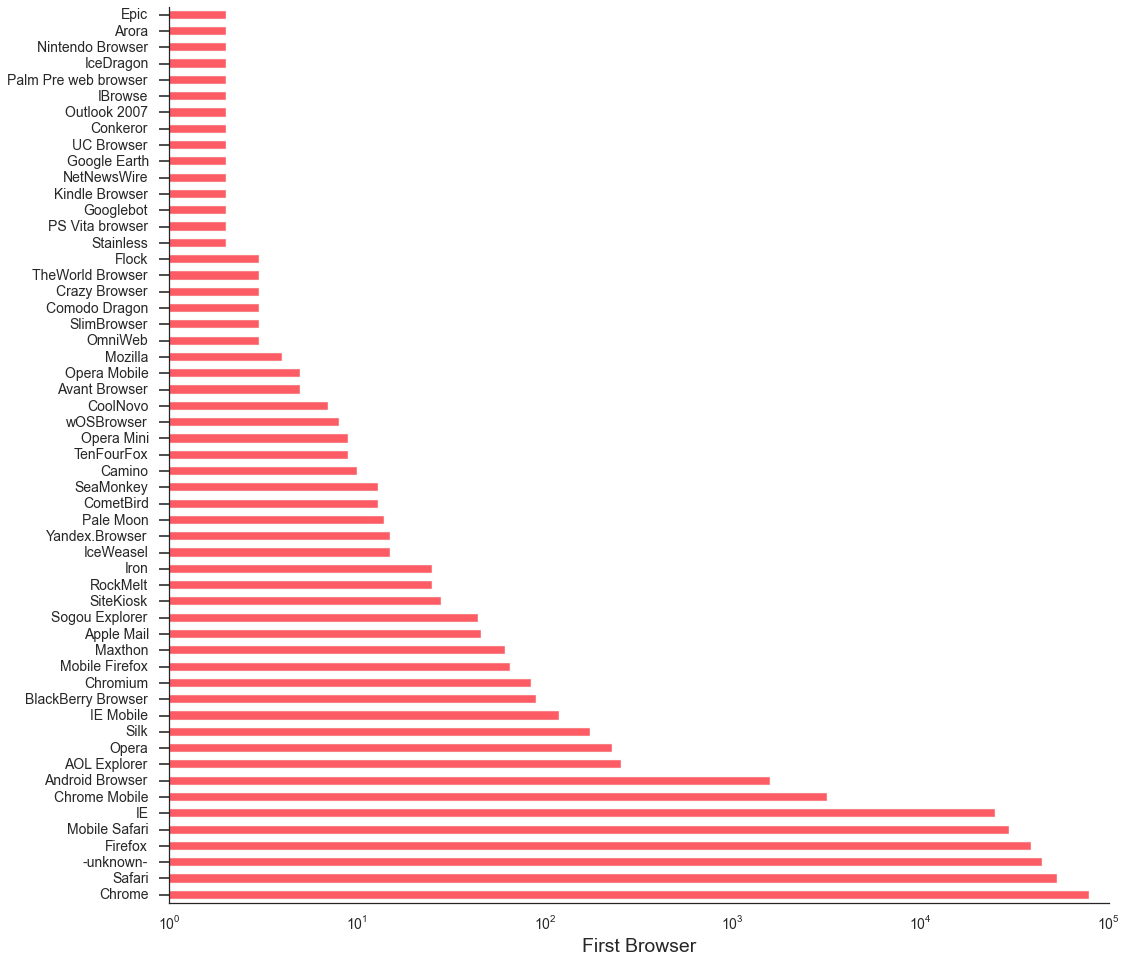

In [28]:
plt.figure(figsize=(15,15))
users.first_browser.value_counts(dropna=False).plot(kind='barh', color='#FD5C64', log=True, fontsize=14, rot=0)
plt.xlabel('First Browser')
sns.despine()
plt.show()

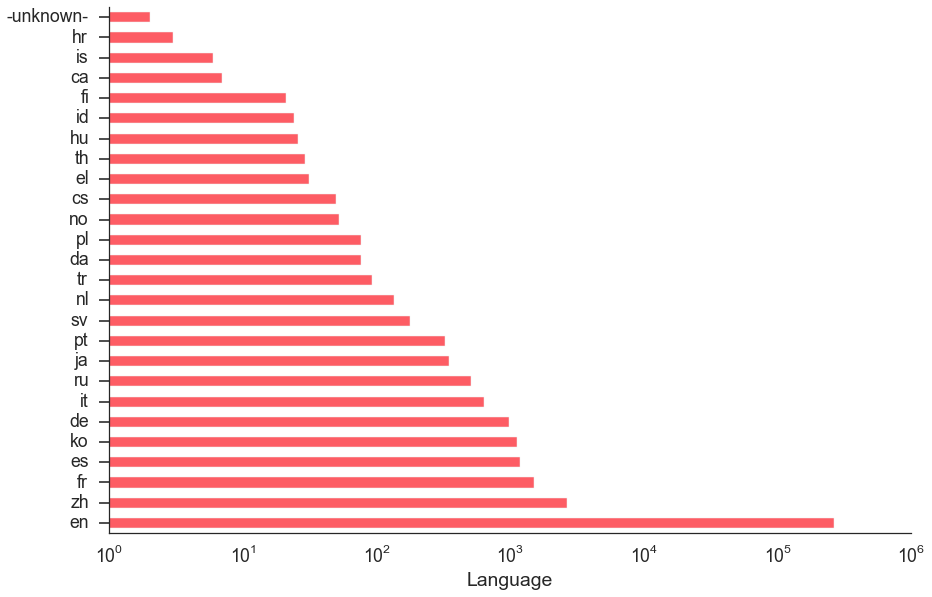

In [29]:
users.language.value_counts(dropna=False).plot(kind='barh', color='#FD5C64', log=True, rot=0)
plt.xlabel('Language')
sns.despine()
plt.show()

In [30]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435


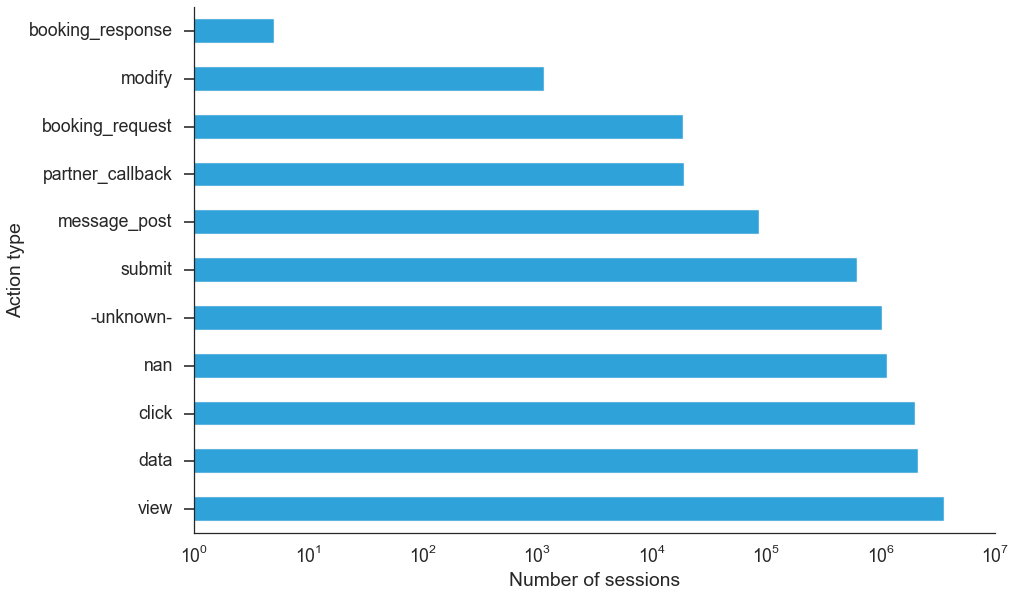

In [31]:
sessions.action_type.value_counts(dropna=False).plot(kind='barh', log=True, rot=0)
plt.xlabel('Number of sessions')
plt.ylabel('Action type')
sns.despine()
plt.show()

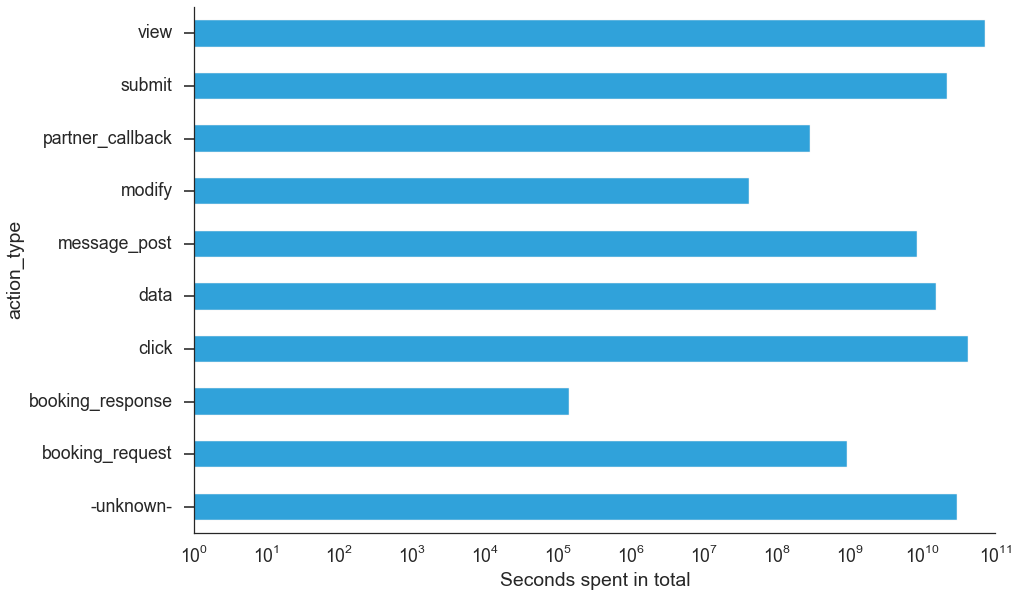

In [32]:
sessions.groupby('action_type').secs_elapsed.sum().plot(kind='barh', log=True, rot=0)
plt.xlabel('Seconds spent in total')
sns.despine()
plt.show()

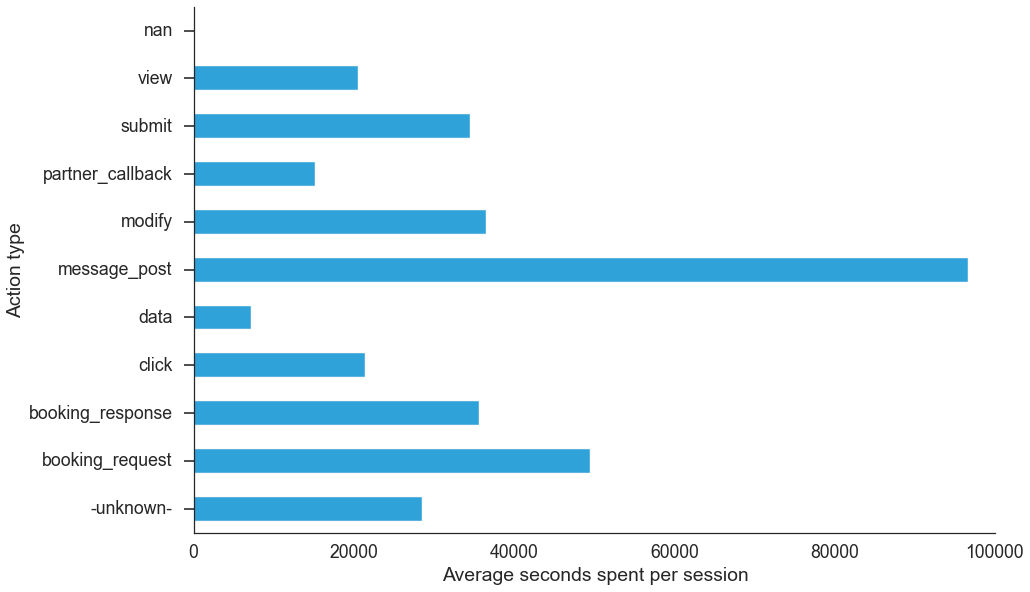

In [33]:
secs_per_session_by_action = sessions.groupby('action_type').secs_elapsed.sum()/sessions.action_type.value_counts(dropna=False)
secs_per_session_by_action.plot(kind='barh', rot=0)
plt.xlabel('Average seconds spent per session')
plt.ylabel('Action type')
sns.despine()
plt.show()

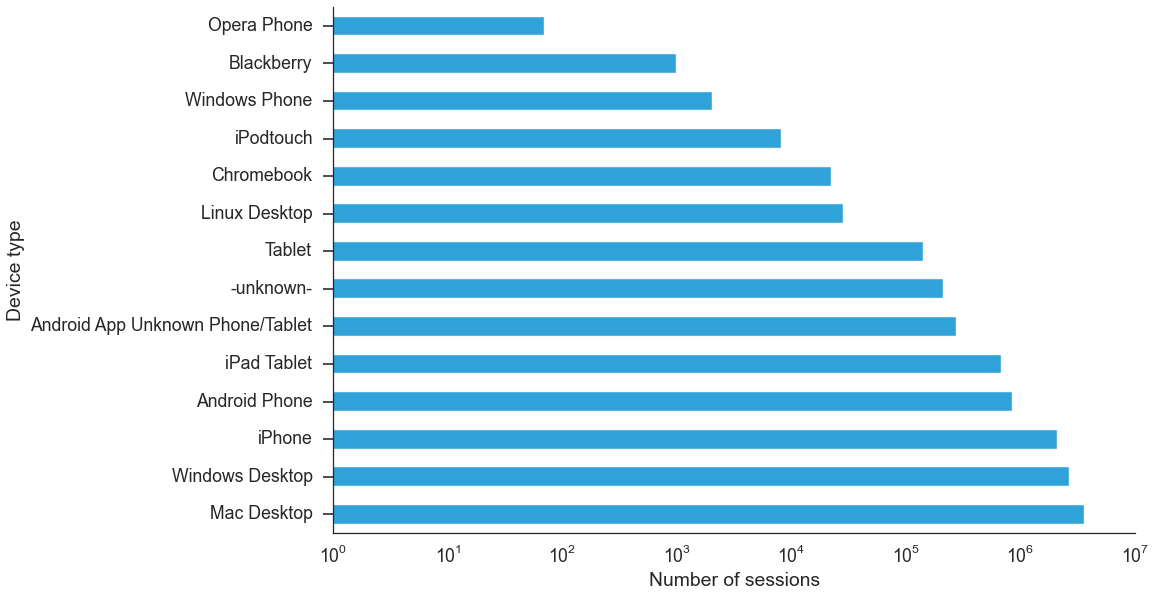

In [34]:
sessions.device_type.value_counts(dropna=False).plot(kind='barh', log=True, rot=0)
plt.xlabel('Number of sessions')
plt.ylabel('Device type')
sns.despine()
plt.show()

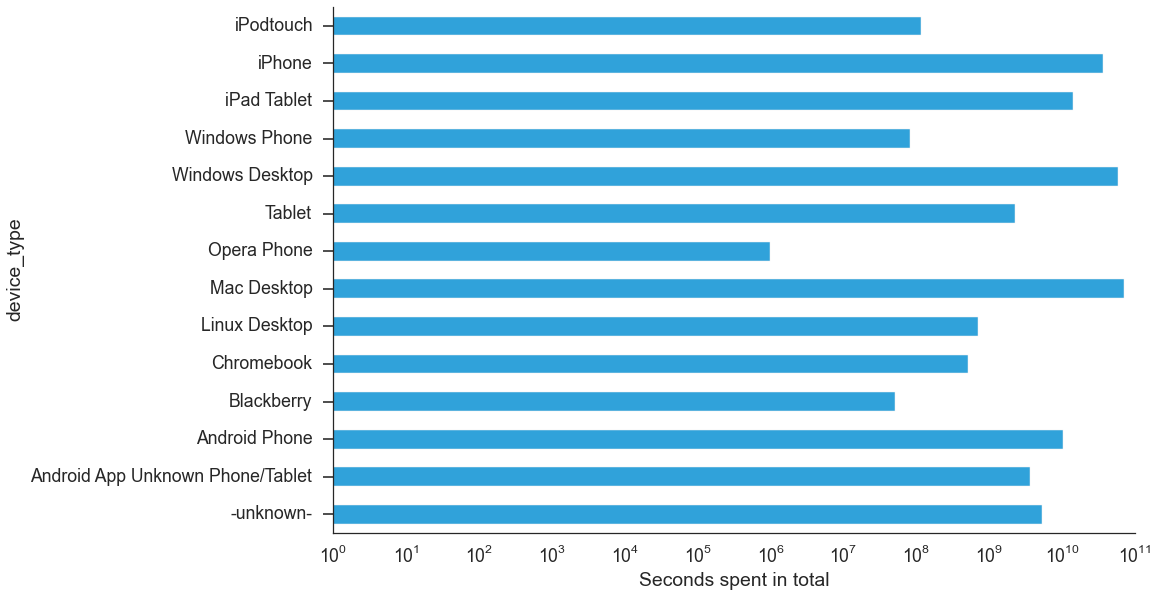

In [35]:
sessions.groupby('device_type').secs_elapsed.sum().plot(kind='barh', log=True, rot=0)
plt.xlabel('Seconds spent in total')
sns.despine()
plt.show()

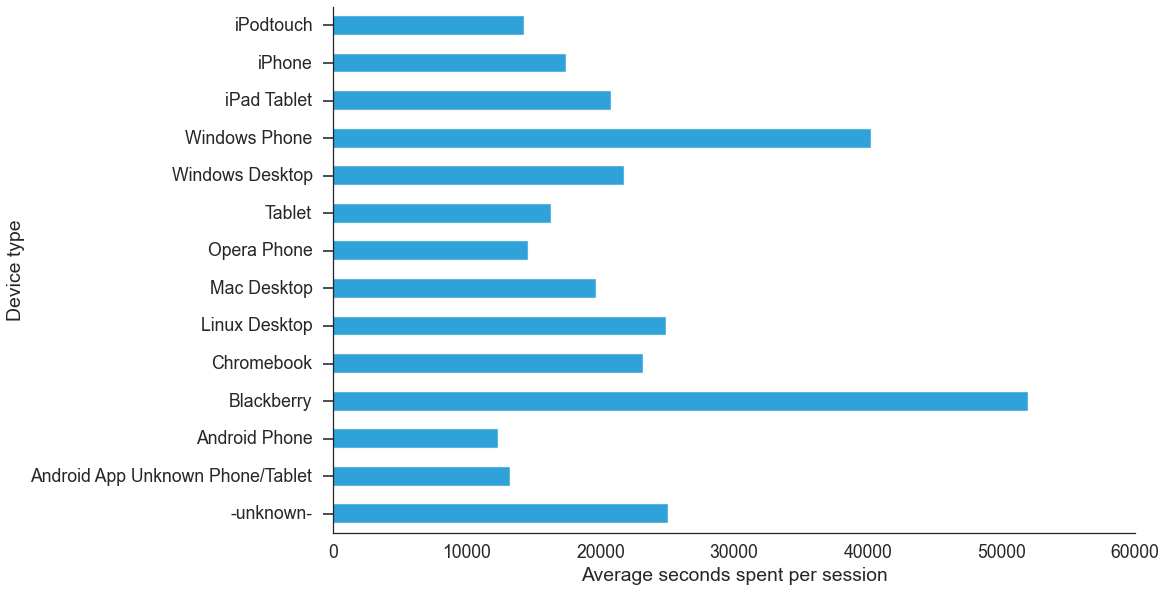

In [36]:
secs_per_session_by_device = sessions.groupby('device_type').secs_elapsed.sum()/sessions.device_type.value_counts(dropna=False)
secs_per_session_by_device.plot(kind='barh', rot=0)
plt.xlabel('Average seconds spent per session')
plt.ylabel('Device type')
sns.despine()
plt.show()

In [37]:
sessions.groupby('user_id').secs_elapsed.sum().describe()

count      134057.000000
mean      1505579.082249
std       1896684.768312
min             0.000000
25%        273401.000000
50%        867002.000000
75%       2017778.000000
max      38221363.000000
Name: secs_elapsed, dtype: float64

In [38]:
test.id.unique()

array(['5uwns89zht', 'jtl0dijy2j', 'xx0ulgorjt', ..., 'fa6260ziny',
       '87k0fy4ugm', '9uqfg8txu3'], dtype=object)

In [39]:
#'5uwns89zht' is in sessions.user_id.unique()
count  = 0
for i in test.id.unique():
    if count == 10:
        break
    print np.any(sessions.user_id.unique() == i)
    count += 1

True
True
True
True
True
True
True
True
True
True
